In [ ]:
'''
Problem statement
A glass manufacturing plant uses different earth elements to design new glass materials based on customer requirements.
For that, they would like to automate the process of classification as it’s a tedious job to manually classify them. 
Help the company achieve its objective by correctly classifying the glass type based on the other features using KNN algorithm.


1.Business Problem
1.1. What is the business objective?
Automate the classification of glass types to enhance efficiency in the manufacturing process.
Improve accuracy in the classification of glass materials, ensuring they meet specific customer requirements.
Reduce manual labor and save time by implementing an automated classification system.

1.2. Are there any constraints?
The accuracy of the model is crucial, as incorrect classification could result in poor-quality glass production.
Data availability may limit the model’s performance if certain glass types are underrepresented.
Limited resources for handling additional computational costs if the model is deployed in a real-time production environment.

'''

In [3]:
#DATA DICTIONARY
import pandas as pd

data = {
    'Feature': ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'],
    'Data Type': ['Float'] * 9 + ['Integer'],
    'Relevant to Model': ['Yes'] * 10,
    'Description': [
        'Refractive Index - Measure of the bending of light, relevant for classifying different types of glass',
        'Sodium content - Affects glass properties like durability and transparency, relevant for classification',
        'Magnesium content - Can alter the strength of the glass, relevant for classification',
        'Aluminum content - Influences glass hardness, relevant for classification',
        'Silicon content - Primary component in glass, highly relevant for classification',
        'Potassium content - Impacts thermal stability, relevant for distinguishing glass types',
        'Calcium content - Affects glass structure, relevant for classification',
        'Barium content - Impacts glass density, relevant for classification',
        'Iron content - Affects glass color, relevant for classification',
        'Class Type - Target variable, with categories representing various glass types'
    ]
}

dict = pd.DataFrame(data)
dict

,Feature,Data Type,Relevant to Model,Description
0,RI,Float,Yes,Refractive Index - Measure of the bending of l...
1,Na,Float,Yes,Sodium content - Affects glass properties like...
2,Mg,Float,Yes,Magnesium content - Can alter the strength of ...
3,Al,Float,Yes,"Aluminum content - Influences glass hardness, ..."
4,Si,Float,Yes,"Silicon content - Primary component in glass, ..."
5,K,Float,Yes,"Potassium content - Impacts thermal stability,..."
6,Ca,Float,Yes,"Calcium content - Affects glass structure, rel..."
7,Ba,Float,Yes,"Barium content - Impacts glass density, releva..."
8,Fe,Float,Yes,"Iron content - Affects glass color, relevant f..."
9,Type,Integer,Yes,"Class Type - Target variable, with categories ..."


In [4]:
import pandas as pd
data=pd.read_csv("glass.csv")
print(data.columns)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [5]:
#Exploratory data analysis
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
#NO NULL VALUE IN THA DATA

In [8]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
#DATA PRE-PROCESSING

In [10]:
features=data.drop(columns=["Type"])
target=data['Type']

In [11]:
#standardize the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)
data_scaled=pd.DataFrame(features_scaled,columns=features.columns)
data_scaled['Type']=target
data_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


In [12]:
#plot boxplots for each feature
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

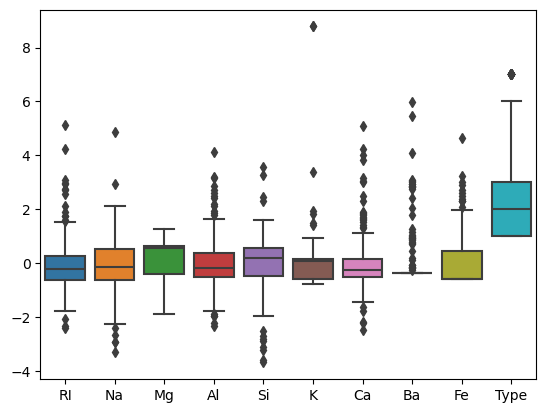

In [13]:
sns.boxplot(data=data_scaled)

In [14]:
#ALL COLUMNS HAVING OUTLIERS EXCEPT THE MG COLUMN


In [15]:
import numpy as np
#Define a function to cap outliers based on IQR
def cap_outliers(df,columns):
    for col in columns:
        #Calculate Q1 and Q3
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        #Calculate IQR
        IQR=Q3-Q1
        #Define upper and lower bounds
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        #Cap the values outside these bounds
        df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
        df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
    return df

In [16]:
#Apply the function to the dataframe
data_capped = cap_outliers(data,data.columns)
data_capped

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0,6.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0,6.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0,6.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0,6.0


In [17]:
#now standardize the data with the help of standardize
features=data_capped.drop(columns=["Type"])
target=data_capped['Type']
features_scaled=scaler.fit_transform(features)
data_scaled=pd.DataFrame(features_scaled,columns=features.columns)
data_scaled['Type']=target
data_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,0.0,-0.619091,1.0
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,0.0,-0.619091,1.0
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,0.0,-0.619091,1.0
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,0.0,-0.619091,1.0
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,0.0,-0.619091,1.0


In [18]:
#NOW AGAIIN CHECK THE BOX PLOT VISUALIZATION

<Axes: >

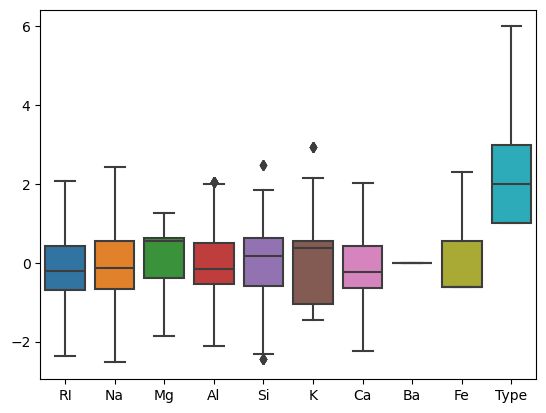

In [19]:
sns.boxplot(data=data_scaled)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
#Type as target feature
X = data_scaled.drop('Type', axis=1)
y = data_scaled['Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors

In [23]:
#Train the model
knn.fit(X_train, y_train)
#Make predictions on the test set
y_pred=knn.predict(X_test)

In [24]:
#Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7441860465116279


In [25]:
#try and select correct value for k
acc=[]
#running KNN algorithm for k=3 to k=50 in steps of 2
for i in range(3,50,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    train_acc=np.mean(knn.predict(X_train)==y_train)
    test_acc=np.mean(y_pred==y_test)
    acc.append([train_acc,test_acc])

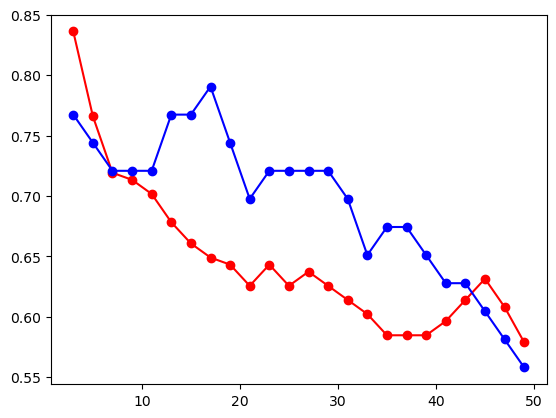

In [26]:
#plot the graph for tain_acc and test_acc
import matplotlib.pyplot as plt
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'ro-',label="Training Accuracy")
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'bo-',label="Testing Accuracy")

In [27]:
#highest accuracy for k=7, k=9, k=43
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7209302325581395


In [28]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7209302325581395


In [29]:
knn=KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.627906976744186


In [30]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7441860465116279


In [31]:
#6.	Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided?
'''
1.Automates the classification process, eliminating the need for manual analysis and decision-making. This frees up employees for other tasks 
and reduces the time it takes to classify new glass materials.
2.KNN can effectively learn complex relationships between features and glass types, potentially leading to more accurate classifications
compared to manual methods.
3.As the company introduces new glass types or collects more data, the KNN model can be easily retrained to incorporate this new information.
'''

'\n1.Automates the classification process, eliminating the need for manual analysis and decision-making. This frees up employees for other tasks \nand reduces the time it takes to classify new glass materials.\n2.KNN can effectively learn complex relationships between features and glass types, potentially leading to more accurate classifications\ncompared to manual methods.\n3.As the company introduces new glass types or collects more data, the KNN model can be easily retrained to incorporate this new information.\n'